In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline
sns.set_theme()
countries = {"Germany": "D",
             "Austria": "A",
             "Belgium" : "B",
             "Spain": "E",
             "France": "F",
             "Italy": "I",
             "Luxembourg": "L",
             "Netherlands": "NL"}

### Load Dataset

In [12]:
file_path = os.path.join("data", "autoscout_dataset.csv")
df = pd.read_csv(file_path, sep=";", index_col="url")

In [101]:
df['Anno'] = pd.to_datetime(df['Anno'], format="%m/%Y")
df = df[~df.index.duplicated(keep='first')]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438 to peugeot-308-bluehdi-120-s-s-eat6-sw-allure-diesel-blu-azzurro-1bcdc7fa-1091-4da3-9f56-c7c9b55bed70
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Acconto                  1747 non-null   float64       
 1   Anno                     1677 non-null   datetime64[ns]
 2   Carburante               1751 non-null   object        
 3   Carrozzeria              1751 non-null   object        
 4   Chilometraggio           1709 non-null   float64       
 5   Cilindrata_cm3           1530 non-null   float64       
 6   Cilindri                 1465 non-null   float64       
 7   Colore                   1533 non-null   object        
 8   Comfort                  1457 non-null   object        
 9   Consumo_comb_

In [21]:
df.describe()

,makeId,modelOrModelLineId,Prezzo_auto,Posti,Porte,garanzia_mesi,Chilometraggio,Cilindrata_cm3,Marce,Cilindri,Peso_a_vuoto_kg,Emissioni_CO2_gKm,Acconto,price,zip,potenza_kw,potenza_cv,Consumo_comb_L100km,Consumo_urb_L100km,Consumo_extraurb_L100km
count,5228.000000,5202.000000,3948.000000,5073.000000,5084.000000,2194.000000,5.005000e+03,4936.000000,4545.000000,4504.000000,3404.000000,3891.000000,5211.000000,5.228000e+03,5228.000000,5186.000000,5186.000000,4009.000000,3497.000000,3501.000000
mean,1645.144223,19736.490965,15642.354357,4.762074,4.549961,15.472197,8.338017e+04,1631.543558,5.996480,3.887655,1426.455347,124.717296,1253.683746,2.452676e+04,34237.052410,97.450829,132.575395,5.304166,6.500172,4.695830
std,5492.428028,19795.488073,7481.893469,0.778231,0.866259,9.203402,7.196844e+04,603.990214,1.348247,0.844198,333.284492,46.321241,3598.171043,1.468663e+05,25689.247618,48.271408,65.640838,2.565243,3.313102,2.106272
min,6.000000,1600.000000,700.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,3.000000e+02,10.000000,1.000000,1.000000,0.700000,1.000000,1.000000
25%,28.000000,2090.000000,9800.000000,5.000000,4.000000,12.000000,3.000000e+04,1242.000000,5.000000,4.000000,1190.000000,107.000000,0.000000,1.180000e+04,16140.500000,68.000000,92.000000,4.200000,5.000000,3.900000
50%,42.000000,18486.000000,15490.000000,5.000000,5.000000,12.000000,6.866600e+04,1560.000000,6.000000,4.000000,1395.000000,119.000000,0.000000,1.815950e+04,30027.000000,88.000000,120.000000,4.900000,5.900000,4.400000
75%,65.000000,19947.750000,21500.000000,5.000000,5.000000,12.000000,1.213510e+05,1968.000000,7.000000,4.000000,1605.000000,138.000000,0.000000,2.720050e+04,46047.000000,110.000000,150.000000,5.800000,7.200000,5.000000
max,51924.000000,76350.000000,30000.000000,9.000000,6.000000,84.000000,1.500000e+06,15607.000000,10.000000,12.000000,3500.000000,1210.000000,50616.000000,9.999999e+06,98070.000000,530.000000,721.000000,69.000000,88.000000,57.000000


In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Acconto,Anno,Carburante,Carrozzeria,Chilometraggio,Cilindrata_cm3,Cilindri,Colore,Comfort,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Extra,Intrattenimento__Media,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,Sicurezza,Tagliandi_certificati,Tipo_di_cambio,Tipo_di_veicolo,Trazione,city,country,countryCode,date,garanzia_mesi,makeId,maker,model,modelOrModelLineId,modelVersionInput,potenza_cv,potenza_kw,price,street,unico_proprietario,zip
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438,0.0,09/2016,Diesel,Berlina,115172.0,1598.0,4.0,Bianco,Alzacristalli elettrici;Climatizzatore;Cruise ...,3.0,3.0,4.0,101.0,Freno di stazionamento elettrico;Marmitta cata...,Autoradio;Bluetooth;CD;USB;Vivavoce,NaN,1312.0,5.0,5.0,14500.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,Anteriore,Bolzano - Bz,Italy,IT,2022-11-05 19:24:48.964971,12.0,74,Volkswagen,Golf,2084.0,1.6 tdi 90 cv 5p. business trendline bluemotio...,90.0,66.0,14500.0,"Via Lancia, 3",False,39100
bmw-430-m-sport-19-navi-pro-tetto-apribile-pdc-keyless-benzina-nero-e6fef875-6ade-407e-ab12-58f424825195,0.0,10/2021,Benzina,Cabrio,10900.0,1998.0,4.0,Nero,Alzacristalli elettrici;Bracciolo;Chiusura cen...,NaN,NaN,NaN,NaN,"Cerchi in lega (19"");Leve al volante;Luce d'am...",Schermo multifunzione interamente digitale;Sou...,8.0,NaN,3.0,5.0,NaN,ABS;Airbag conducente;Airbag laterali;Airbag p...,True,Automatico,Aziendale,Posteriore,Merate - Lecco - LC,Italy,IT,2022-11-05 19:24:49.633149,NaN,13,BMW,430,20330.0,M SPORT -19\,245.0,180.0,62900.0,"Via Sandro Pertini, 23",True,23807
renault-master-t35-2-3-dci-135cv-l2h2-ice-e6d-temp-diesel-bianco-afd0cb83-a5ed-40bc-8627-eb48c94ae24d,0.0,NaN,Diesel,Furgone,0.0,2299.0,4.0,Bianco,Cruise Control;Sensore di luminosità;Sensore d...,6.7,NaN,NaN,177.0,NaN,CD;MP3,6.0,20.0,4.0,3.0,28550.0,Airbag conducente;Airbag laterali;Fari LED,False,Manuale,Nuovo,Anteriore,Porto Mantovano - Mantova - Mn,Italy,IT,2022-11-05 19:24:50.333591,24.0,60,Renault,Master,14717.0,T35 2.3 dci 135cv L2H2 Ice E6d-temp,135.0,99.0,28550.0,Strada Marmirolo 5,False,46047
peugeot-5008-1-6-hdi-8v-business-112cv-diesel-grigio-e95e6b9f-55dc-460f-8c61-6eed529eacc3,0.0,11/2010,Diesel,Monovolume,196000.0,1560.0,4.0,Grigio,Alzacristalli elettrici;Bracciolo;Climatizzato...,5.3,4.6,6.5,NaN,Cerchi in lega;Ruotino,Autoradio;Bluetooth;Computer di bordo;MP3;Soun...,6.0,1547.0,5.0,7.0,5490.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,NaN,Motta di Livenza - TV,Italy,IT,2022-11-05 19:24:51.679939,NaN,55,Peugeot,5008,19235.0,1.6 hdi 8v Business 112cv,111.0,82.0,5490.0,Via Piemonte 5,False,31045
stin-healey-3000-mk3-benzina-rosso-99e0017a-354f-4fe3-9273-7c2d83407f10,0.0,01/1964,Benzina,Cabrio,3000.0,3000.0,6.0,Rosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,4.0,NaN,NaN,False,Manuale,Epoca,Posteriore,Roncadelle - Brescia - BS,Italy,IT,2022-11-05 19:24:53.177445,NaN,51901,Austin-Healey,3000,76119.0,mk3,150.0,110.0,64800.0,"Via San Bernardino, 67",False,25030


### Find Missing data

In [19]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(12,10))
        plt.show()
    else:
        print('No NAs found')



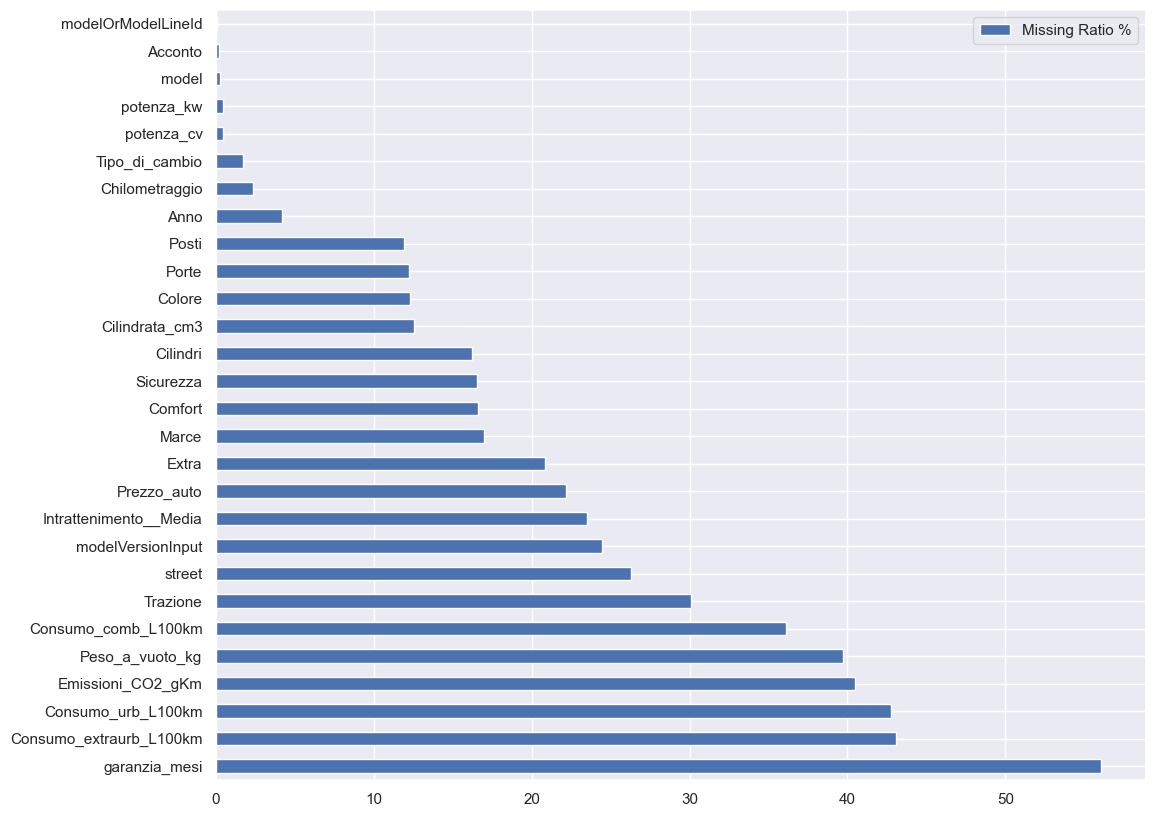

In [21]:
plot_nas(df)

### Value counts for some categorical data

In [35]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in ['maker', 'model', 'Carburante', 'Trazione', 'Tipo_di_cambio', 'Colore']],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [36]:
unique_counts

,Column_Name,Num_Unique
3,Trazione,3
4,Tipo_di_cambio,3
2,Carburante,7
5,Colore,14
0,maker,54
1,model,393


<AxesSubplot:>

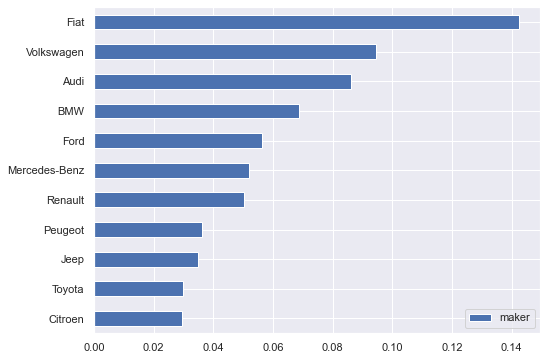

In [40]:
col = 'maker'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

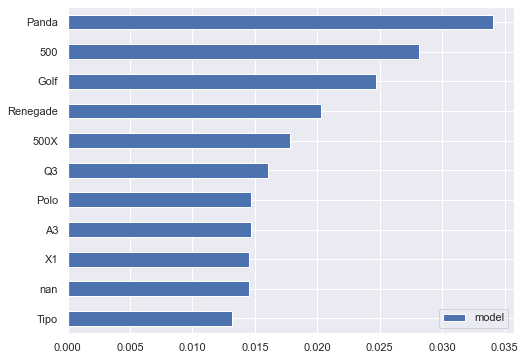

In [39]:
col = 'model'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

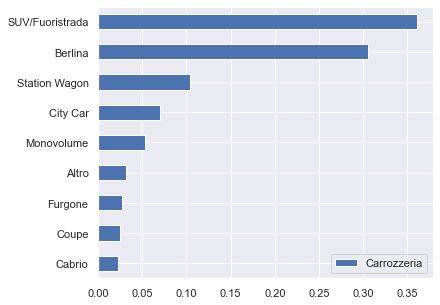

In [19]:
col = 'Carrozzeria'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

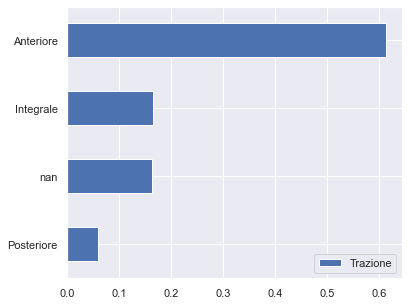

In [10]:
col = 'Trazione'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

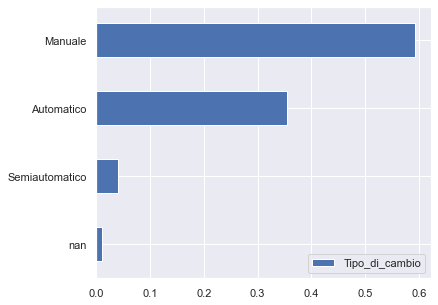

In [22]:
col = 'Tipo_di_cambio'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

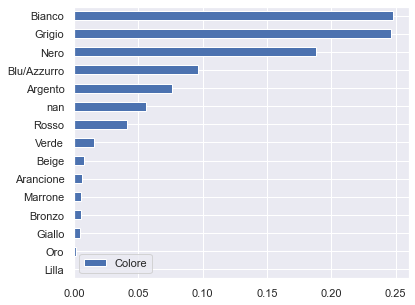

In [ ]:
col = 'Colore'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

### Numerical variables exploration

In [53]:
var_corr = df[['price', 'potenza_kw', 'Cilindrata_cm3', 'Chilometraggio','Consumo_comb_L100km', 'unico_proprietario', 'Peso_a_vuoto_kg', 'Posti', 'garanzia_mesi']].corr()

In [54]:
var_corr

,price,potenza_kw,Cilindrata_cm3,Chilometraggio,Consumo_comb_L100km,unico_proprietario,Peso_a_vuoto_kg,Posti,garanzia_mesi
price,1.000000,0.727057,0.497836,-0.379111,0.334128,-0.041991,0.352970,-0.138899,0.342917
potenza_kw,0.727057,1.000000,0.796567,-0.004623,0.473953,-0.008926,0.623216,-0.024144,0.074277
Cilindrata_cm3,0.497836,0.796567,1.000000,0.212882,0.560837,0.015431,0.660554,0.008413,-0.022737
Chilometraggio,-0.379111,-0.004623,0.212882,1.000000,0.178503,0.056234,0.142484,0.137406,-0.434310
Consumo_comb_L100km,0.334128,0.473953,0.560837,0.178503,1.000000,-0.072784,0.285252,-0.165579,0.070949
unico_proprietario,-0.041991,-0.008926,0.015431,0.056234,-0.072784,1.000000,0.071248,0.039897,-0.318310
Peso_a_vuoto_kg,0.352970,0.623216,0.660554,0.142484,0.285252,0.071248,1.000000,0.314691,0.141617
Posti,-0.138899,-0.024144,0.008413,0.137406,-0.165579,0.039897,0.314691,1.000000,-0.046559
garanzia_mesi,0.342917,0.074277,-0.022737,-0.434310,0.070949,-0.318310,0.141617,-0.046559,1.000000


<AxesSubplot:>

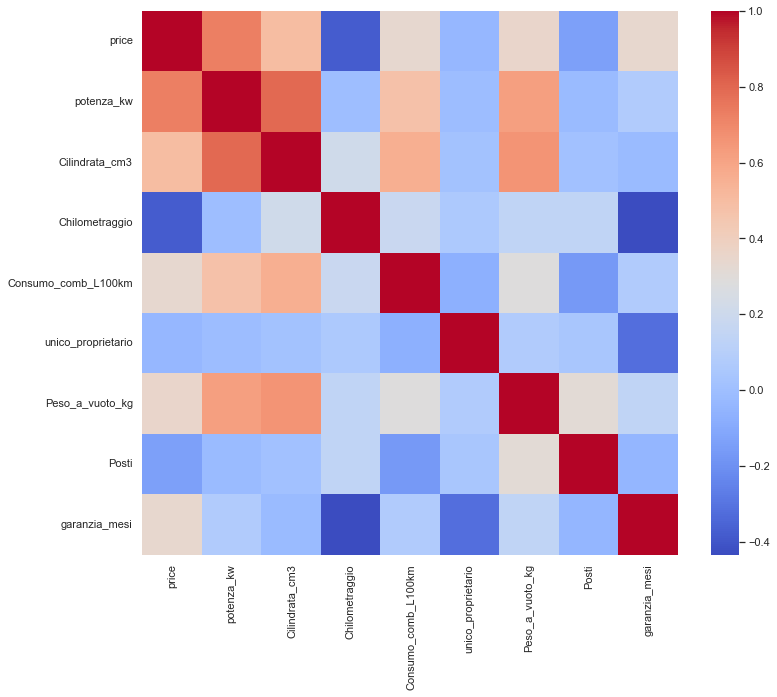

In [59]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(var_corr, cmap="coolwarm")

<AxesSubplot:ylabel='Frequency'>

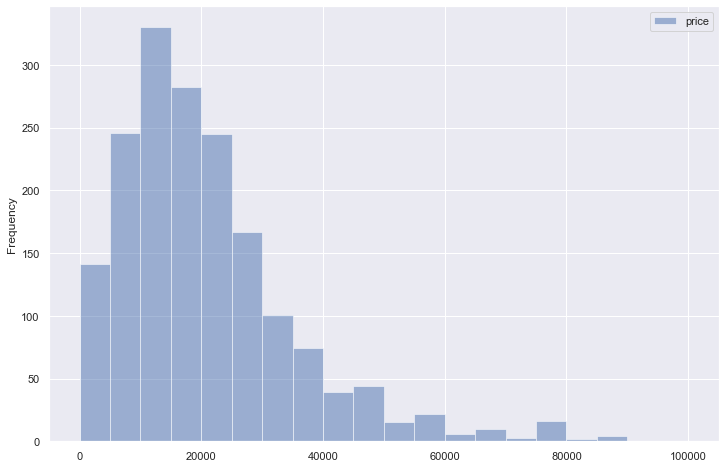

In [44]:
#df['price'].apply(np.log).plot.hist(bins=20 ,legend=True, alpha=0.5, figsize=(12,8))
df['price'].plot.hist(bins=20, range=(0, 1e5), legend=True, alpha=0.5, figsize=(12,8))

Carrozzeria
Altro              AxesSubplot(0.125,0.125;0.775x0.755)
Berlina            AxesSubplot(0.125,0.125;0.775x0.755)
Cabrio             AxesSubplot(0.125,0.125;0.775x0.755)
City Car           AxesSubplot(0.125,0.125;0.775x0.755)
Coupe              AxesSubplot(0.125,0.125;0.775x0.755)
Furgone            AxesSubplot(0.125,0.125;0.775x0.755)
Monovolume         AxesSubplot(0.125,0.125;0.775x0.755)
SUV/Fuoristrada    AxesSubplot(0.125,0.125;0.775x0.755)
Station Wagon      AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

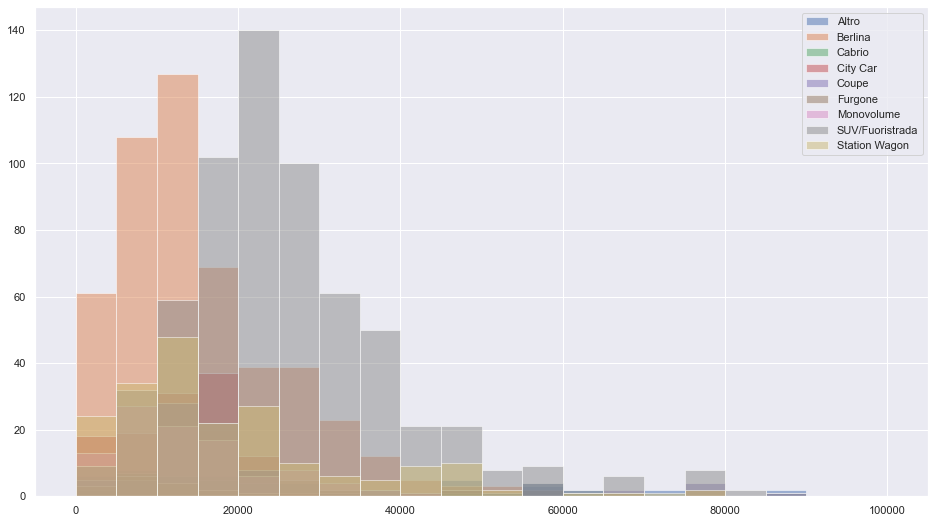

In [67]:
df.groupby('Carrozzeria',sort=True)['price'].hist(bins=20, density=False, range=(0,1e5), alpha=0.5, legend=True, figsize=(16,9))

In [79]:
df[['price', 'Chilometraggio', 'potenza_kw']]

,price,Chilometraggio,potenza_kw
url,,,
volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438,14500.0,115172.0,66.0
bmw-430-m-sport-19-navi-pro-tetto-apribile-pdc-keyless-benzina-nero-e6fef875-6ade-407e-ab12-58f424825195,62900.0,10900.0,180.0
renault-master-t35-2-3-dci-135cv-l2h2-ice-e6d-temp-diesel-bianco-afd0cb83-a5ed-40bc-8627-eb48c94ae24d,28550.0,0.0,99.0
peugeot-5008-1-6-hdi-8v-business-112cv-diesel-grigio-e95e6b9f-55dc-460f-8c61-6eed529eacc3,5490.0,196000.0,82.0
stin-healey-3000-mk3-benzina-rosso-99e0017a-354f-4fe3-9273-7c2d83407f10,64800.0,3000.0,110.0
...,...,...,...
renault-megane-diesel-grigio-0c65d0bc-2022-456a-92f1-60db97a29527,13500.0,125000.0,81.0
jeep-renegade-1-3-150-cv-limited-black-pack-18-led-8-4-benzina-nero-e5be183a-5f33-4a3d-a12f-4feee481bd85,23490.0,24000.0,110.0
seat-ibiza-1-0-mpi-5p-business-benzina-bianco-9d3948ff-b844-49ad-98d4-79eb8a04c31f,14900.0,27800.0,59.0


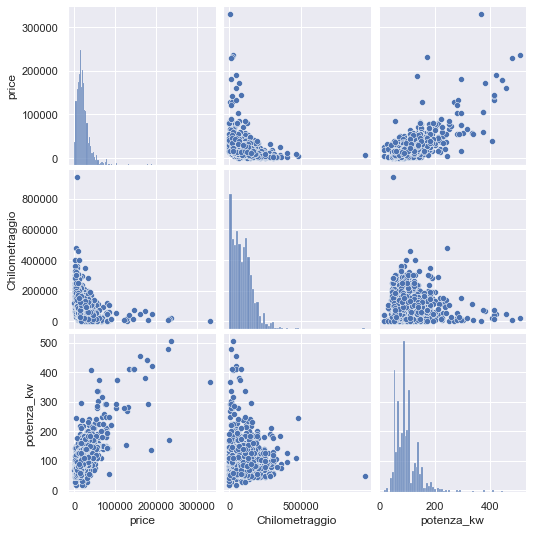

In [104]:
sns.pairplot(df[['price', 'Chilometraggio', 'potenza_kw', 'Anno']])